In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# import sys
# sys.path.append(r'C:\Users\justink\Code\dro')

import dro.utilities as dro
import dro.plotting_functions as dro_plots

failed to import CV2 in core.utilities
failed to import mask in core.jcamdata.py
failed to import get_mask_dict_gui in core.epoch.py
failed to import aibs.Analysis.Core.smooth
failed to import mask relalated functions in __init__.py


/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Load data

In [3]:
from braintv_pilot.latest import local_dir
df = dro.load_from_folder(local_dir)

error loading file 161107125855-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276600.pkl: 
error loading file .161107103018-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl.CtyC9d: 


In [4]:
from braintv_pilot.cohorts import cohort_assignment
cohort_assignment

,mouse,experiment,cohort,day_zero
0,M272464,visual_behavior_development,4,2016-10-31
1,M271733,visual_behavior_development,4,2016-10-31
2,M271728,visual_behavior_development,4,2016-10-31
3,M276951,visual_behavior_development,4,2016-10-31
4,M276950,visual_behavior_development,4,2016-10-31
5,M276600,visual_behavior_development,4,2016-10-31
6,M272465,visual_behavior_development,3,2016-10-10
7,M265158,visual_behavior_development,3,2016-10-10
8,M271966,visual_behavior_development,3,2016-10-10
9,M265154,visual_behavior_development,3,2016-10-10


In [6]:
from braintv_pilot.cohorts import mouse_info
mouse_df = cohort_assignment['mouse'].apply(lambda mouse: pd.Series(mouse_info(mouse)))
cohort_assignment = cohort_assignment.merge(
    mouse_df,
    how='left',
    left_on='mouse',
    right_on='mouse_id'
)

In [7]:
df = df.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)

In [10]:
## identify training day

day_zero = {r['mouse']:"{:%Y-%m-%d}".format(r['day_zero']) for _,r in cohort_assignment.iterrows()}

def get_training_day(df_in):
    '''adds a column to the dataframe with the number of unique training days up to that point
         '''
    coh = cohort_assignment.set_index('mouse')['cohort']
#     print coh

    training_day_lookup = {}
    for mouse, group in df_in.groupby('mouse_id'):
        dates = np.sort(group['date'].unique())
        try:
            dz = day_zero[mouse]
            offset = np.argwhere(dates==dz)[0][0]
        except KeyError:
            print 'day zero not found for {}'.format(mouse)
            offset = 0
        except IndexError:
            print 'day zero ({}) not found in dates'.format(dz)
            offset = 0
        print offset
        training_day_lookup[mouse] = {date:training_day-offset for training_day,date in enumerate(dates)}
        print mouse,dates
    return df_in.apply(lambda row: training_day_lookup[row['mouse_id']][row['date']],axis=1)

df['training_day'] = get_training_day(df)

## build arrays for change detection

df['change'] = df['trial_type']=='go'
df['detect'] = df['response']==1.0

## calculate reaction times

df['reaction_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else np.nan)
df['reaction_time'] = df.apply(lambda row: row['reaction_time'] - row['change_time'],axis=1)

## unwrap the response window
df['response_window_lower'] = df['response_window'].map(lambda x: x[0])
df['response_window_upper'] = df['response_window'].map(lambda x: x[1])


0
M246782 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
0
M249123 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
0
M250783 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20'
 '2016-09-21' '2016-09-22' '2016-09-23' '2016-09-26' '2016-09-27'
 '2016-09-28' '2016-09-29' '2016-09-30' '2016-10-03' '2016-10-05'
 '2016-10-06' '2016-10-07' '2016-10-10' '2016-10-11' '201

## Let's see how wait time (first lick after trial start) varies between animals and training day

Each plot shows cumulative distribution of wait times for the first three training days (darkest line is first day)

In [11]:
df['wait_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else None) - df['starttime']

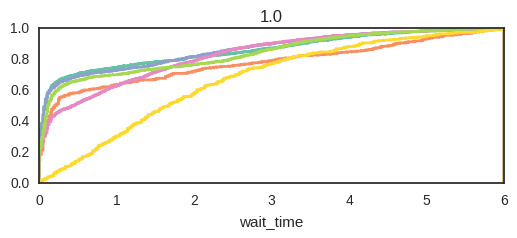

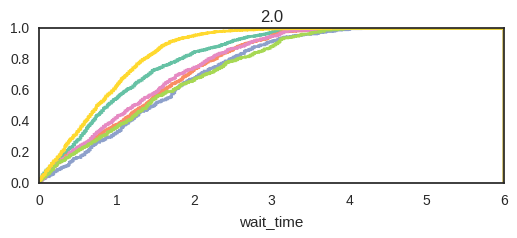

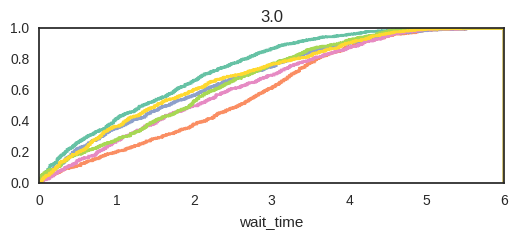

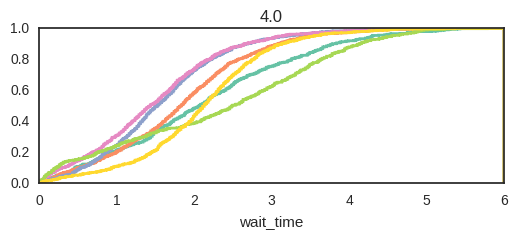

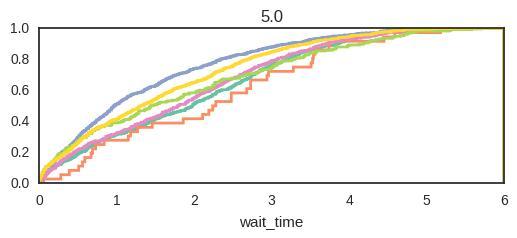

In [12]:
timeout_mask = (
#     df['cohort'].isin(['Cohort 2','Cohort 3'])
#     & (df['training_day'] < 3)
    df['training_day'] == 1
#     & df['trial_type'].isin(['go','catch','aborted'])
)

# for subject in df.mouse_id.unique():

for cohort, group in df[timeout_mask].groupby('cohort'):

    window = (0.0,6)
    binsize = 0.01

    hist_kws = {
        'cumulative':True,
        'histtype':'step',
        'alpha':1,
        'linewidth':2,
        'normed':True,
    }

    f,ax = plt.subplots(1,1,figsize=(6,2),sharex=True)
    
    nsubj = len(group['mouse_id'].unique())
    palette = sns.color_palette("Set2",nsubj)
    
    for ii,(subject, group2) in enumerate(group.groupby('mouse_id')):
        axi = ax
        
        sns.distplot(group2['wait_time'].dropna(),
                     kde=False,
                     bins=np.arange(window[0],window[1]+binsize,binsize),
                     label=str(subject),
                     ax=axi,
                     hist_kws=hist_kws,
                     color=palette[ii],
                    )
        axi.set_ylim(0,1)
        axi.set_xlim(window[0],window[1])
        axi.set_title(cohort)

In [13]:
df['lick_time_from_change'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else None) - df['scheduled_change_time']

1.0 M246782 394


AssertionError: 

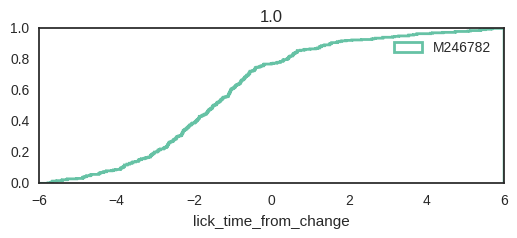

In [19]:
timeout_mask = (
#     df['cohort'].isin(['Cohort 2','Cohort 3'])
#     & (df['training_day'] < 3)
    df['training_day'] == 2
#     & df['trial_type'].isin(['go','catch','aborted'])
)

# for subject in df.mouse_id.unique():

for cohort, group in df[timeout_mask].groupby('cohort'):

    window = (-6,6)
    binsize = 0.01

    hist_kws = {
        'cumulative':True,
        'histtype':'step',
        'alpha':1,
        'linewidth':2,
        'normed':True,
    }

    f,ax = plt.subplots(1,1,figsize=(6,2),sharex=True)
    
    nsubj = len(group['mouse_id'].unique())
    palette = sns.color_palette("Set2",nsubj)
    
    for ii,(subject, group2) in enumerate(group.groupby('mouse_id')):
        print cohort,subject, len(group2)
        axi = ax
        
        sns.distplot(group2['lick_time_from_change'].dropna(),
                     kde=False,
                     bins=np.arange(window[0],window[1]+binsize,binsize),
                     label=str(subject),
                     ax=axi,
                     hist_kws=hist_kws,
                     color=palette[ii],
                    )
        axi.set_ylim(0,1)
        axi.set_xlim(window[0],window[1])
        axi.set_title(cohort)
        plt.legend()
        assert False

In [68]:
df.groupby(['cohort','training_day'])['stimulus_distribution'].unique()

cohort  training_day
1.0      0              [exponential]
         1              [exponential]
         2              [exponential]
         3              [exponential]
         4              [exponential]
         5              [exponential]
         6              [exponential]
         7              [exponential]
         8              [exponential]
         9              [exponential]
         10             [exponential]
         11             [exponential]
         12             [exponential]
         13             [exponential]
         14             [exponential]
         15             [exponential]
         16             [exponential]
         17             [exponential]
         18             [exponential]
         19             [exponential]
         20             [exponential]
         21             [exponential]
         22             [exponential]
         23             [exponential]
         24             [exponential]
         25             [expo

In [42]:
df['trial_scheduled_change_time'] =  df['scheduled_change_time'] - df['starttime'] - df['prechange_minimum']
df['trial_change_time'] =  df['change_time'] - df['starttime'] - df['prechange_minimum']

2.0 M258089 908
2.0 M258173 1769
2.0 M258274 2149
2.0 M258275 1558
2.0 M258276 2824
2.0 M261584 681
3.0 M258194 1522
3.0 M265154 1510
3.0 M265158 1948
3.0 M265166 1968
3.0 M271966 1277
3.0 M272465 1601
4.0 M271728 1617
4.0 M271733 1096
4.0 M272464 1072
4.0 M276600 1993
4.0 M276950 1650
4.0 M276951 1501


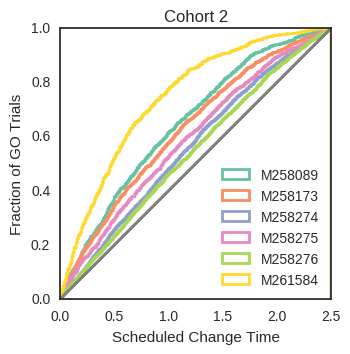

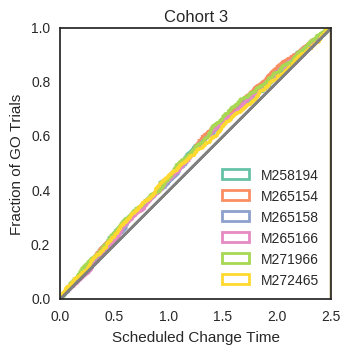

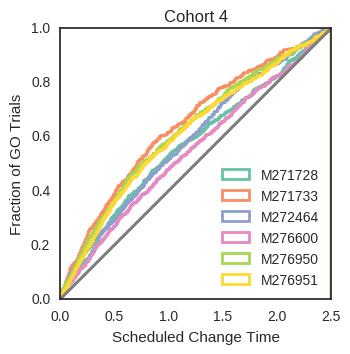

In [100]:
timeout_mask = (
    df['cohort'].isin([2,3,4])
    & (df['training_day'] < 10)
#     df['training_day'] == 2
    & df['trial_type'].isin(['go',])
)

# for subject in df.mouse_id.unique():

for cohort, group in df[timeout_mask].groupby('cohort'):

    window = (0,2.5)
    binsize = 0.01

    hist_kws = {
        'cumulative':True,
        'histtype':'step',
        'alpha':1,
        'linewidth':2,
        'normed':True,
    }

    f,ax = plt.subplots(1,1,figsize=(3.5,3.5),sharex=True)
    
    nsubj = len(group['mouse_id'].unique())
    palette = sns.color_palette("Set2",nsubj)
    
    for ii,(subject, group2) in enumerate(group.groupby('mouse_id')):
        print cohort,subject, len(group2)
        axi = ax
        
        sns.distplot(group2['trial_scheduled_change_time'].dropna(),
                     kde=False,
                     bins=np.arange(window[0],window[1]+binsize,binsize),
                     label=str(subject),
                     ax=axi,
                     hist_kws=hist_kws,
                     color=palette[ii],
                    )
        plt.plot(window,(0,1),color='0.5')
        axi.set_ylim(0,1)
        axi.set_xlim(window[0],window[1])
        axi.set_ylabel('Fraction of GO Trials')
        axi.set_xlabel('Scheduled Change Time')
        axi.set_title('Cohort {}'.format(int(cohort)))
        plt.legend(loc=4)
#         assert False
        plt.savefig('../figures/schedule_change_time_dist_cohort{}.pdf'.format(int(cohort)))

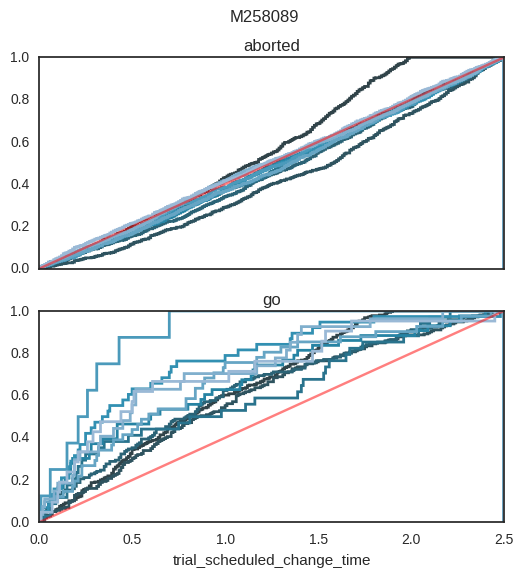

In [84]:
subject = 'M261584'
subject = 'M258089'

window = (0.0,2.5)
binsize = 0.01

hist_kws = {
    'cumulative':True,
    'histtype':'step',
    'alpha':1,
    'linewidth':2,
    'normed':True,
}

mask = (
    df['trial_type'].isin(('go','aborted',))
#     & (df['training_day'].isin(range(5,9)))
    & (df['training_day']<10)
#     & (df['mouse_id']=='M258174')
    & (df['mouse_id']==subject)
)

assert mask.sum()>0

ntype = 2
nday = df[mask]['training_day'].max()+1

f,ax = plt.subplots(ntype,1,figsize=(6,6),sharex=True)


for ii, (key, dfc) in enumerate(df[mask].groupby('trial_type')):
    axi = ax[ii]
    palette = sns.color_palette("PuBuGn_d",nday)
    for key2,group in dfc.groupby('training_day'):
        try:
            sns.distplot(group['trial_scheduled_change_time'].dropna(),
                         kde=False,
                         bins=np.arange(window[0],window[1]+binsize,binsize),
                         label=str(key2),
                         ax=axi,
                         hist_kws=hist_kws,
                         color=palette[key2],
                        )
#                 if key2=='go':
#                     l,u = group['response_time'].dropna().quantile([0.25,0.75])
#                     axi.axvspan(l,u,color='g',alpha=0.2,zorder=-1)
        except ValueError:
            pass
    axi.set_ylim(0,1)
    axi.set_xlim(window[0],window[1])
#     if key==0:
    if ii!=(ntype-1):
#         axi.set_xticks([])
#         axi.set_yticks([])
        axi.set_xlabel('',visible=False)
    axi.set_title(key)
    axi.plot(window,(0,1),color='r',alpha=0.5)
plt.suptitle(subject)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [101]:
group = df.groupby(['mouse_id','training_day']).get_group(('M271728',5))

In [106]:
group.sort_values('starttime').head(50)

,LDT_mode,auto_rewarded,blank_duration_range,blank_screen_timeout,change_color,change_contrast,change_frame,change_image,change_ori,change_size,...,waterrestrictionstartdate,change,detect,reaction_time,response_window_lower,response_window_upper,wait_time,lick_time_from_change,trial_scheduled_change_time,trial_change_time
450785,single,True,"(0.0, 0.0)",False,NaN,1.0,192.0,None,360.0,NaN,...,2016-10-21,True,False,1.351564,0.15,1.0,4.555565,1.532130,1.023435,1.204001
450786,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,1.963821,-2.458456,2.422277,NaN
450787,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,1.814581,-2.607695,2.422276,NaN
450788,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,0.962462,-3.459817,2.422279,NaN
450789,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,0.827518,-3.594760,2.422279,NaN
450790,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,1.878300,-2.543978,2.422278,NaN
450791,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,0.209993,-4.212286,2.422279,NaN
450792,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,0.228234,-2.854569,1.082803,NaN
450793,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,1.862461,-1.220342,1.082804,NaN
450794,single,None,"(0.0, 0.0)",False,NaN,1.0,NaN,None,NaN,NaN,...,2016-10-21,False,False,NaN,0.15,1.0,0.745332,-2.337471,1.082803,NaN
